In [1]:
import pandas as pd
import os
from sklearn.metrics import classification_report
from tqdm import tqdm
import seaborn as sns

In [2]:
import sys
sys.path.append('../src')

from models.classification_methods import get_classification_report

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
dict_cp = {
    'cl':'Hydrox.',
    'lu':'Lula',
    'co':'Sinovac',
    'ig':'Church',
    'gl':'Globo TV',
    'bo':'Bolsonaro',
}

In [5]:
test_results_path = '../reports/test_results/'

In [6]:
list_df_t = os.listdir(test_results_path)
list_df_t.sort()
list_df_t

['belt_filteredTimeline10_pablocosta_bertabaporu-base-uncased_test_results.csv',
 'belt_filteredTimeline10_pablocosta_bertabaporu-base-uncased_test_results_part_bo.csv',
 'belt_filteredTimeline10_pablocosta_bertabaporu-base-uncased_test_results_part_cl.csv',
 'belt_filteredTimeline10_pablocosta_bertabaporu-base-uncased_test_results_part_co.csv',
 'belt_filteredTimeline10_pablocosta_bertabaporu-base-uncased_test_results_part_gl.csv',
 'belt_filteredTimeline10_pablocosta_bertabaporu-base-uncased_test_results_part_ig.csv',
 'belt_filteredTimeline10_pablocosta_bertabaporu-base-uncased_test_results_part_lu.csv',
 'belt_filteredTimeline15_pablocosta_bertabaporu-base-uncased_test_results.csv',
 'belt_filteredTimeline15_pablocosta_bertabaporu-base-uncased_test_results_part_bo.csv',
 'belt_filteredTimeline15_pablocosta_bertabaporu-base-uncased_test_results_part_cl.csv',
 'belt_filteredTimeline15_pablocosta_bertabaporu-base-uncased_test_results_part_co.csv',
 'belt_filteredTimeline15_pablocosta_

In [7]:
df_results = pd.DataFrame({})
for file_name in list_df_t:
    
    full_file_name = test_results_path + file_name
    
    results = pd.read_csv(full_file_name)
    print(f"""
###############################################
# {full_file_name}
###############################################""") 
    
    for target in results.target.unique():
        
        print(f'############# {target} #############')

        
        results_aux = results[results['target'] == target] 
        
        print('number of NaNs: ', results_aux['y_pred'].isna().sum())
        print('total: ', len(results_aux))
        
        results_aux.dropna(subset= ['y_pred'], inplace=True)
        
        if len(results_aux) == 0: continue
    
        cr = classification_report(results_aux.y_test, results_aux.y_pred)
    
        print(cr)
        
    print('mean')
    results.dropna(subset= ['y_pred'], inplace=True)
    print(classification_report(results.y_test, results.y_pred))
    
    print('\n\n')
    
    # df_results = pd.concat([results, df_results])


###############################################
# ../reports/test_results/belt_filteredTimeline10_pablocosta_bertabaporu-base-uncased_test_results.csv
###############################################
############# ig #############
number of NaNs:  0
total:  599
              precision    recall  f1-score   support

       False       0.71      0.66      0.68       339
        True       0.59      0.65      0.62       260

    accuracy                           0.65       599
   macro avg       0.65      0.65      0.65       599
weighted avg       0.66      0.65      0.65       599

############# bo #############
number of NaNs:  0
total:  188
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       162
        True       1.00      0.46      0.63        26

    accuracy                           0.93       188
   macro avg       0.96      0.73      0.80       188
weighted avg       0.93      0.93      0.91       188

############# cl #####

## llama 3 8b

In [8]:
llama3_list_df_t = [filename for filename in list_df_t if ('llama3' in filename) and ('Stance' not in filename)]
llama3_list_df_t

['llama3_filteredTimeline10_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline15_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline20_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline30_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline40_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline5_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline_prompt2_Timeline_test_results.csv',
 'llama3_filtered_Texts10_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts15_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts20_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts30_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts40_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts5_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts_prompt2_Texts_test_results.csv']

In [9]:
llama3_list_df_t.remove('llama3_filtered_Texts_prompt2_Texts_test_results.csv')
llama3_list_df_t.remove('llama3_filteredTimeline_prompt2_Timeline_test_results.csv')
llama3_list_df_t

['llama3_filteredTimeline10_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline15_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline20_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline30_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline40_prompt2_Timeline_test_results.csv',
 'llama3_filteredTimeline5_prompt2_Timeline_test_results.csv',
 'llama3_filtered_Texts10_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts15_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts20_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts30_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts40_prompt2_Texts_test_results.csv',
 'llama3_filtered_Texts5_prompt2_Texts_test_results.csv']

In [10]:
list_df = []

for filename in llama3_list_df_t:
    
    full_file_name = test_results_path + filename
    
    df_aux = pd.read_csv(full_file_name, index_col=0)
    
    df_aux.dropna(subset=['y_pred'], inplace=True)
    
    n_comments = df_aux.n_comments.unique()[0]
    exp_name = df_aux.exp_name.unique()[0]  
    text_col = 'Texts' if 'Texts' in exp_name else 'Timeline' if 'Timeline' in exp_name else None
    
    for target in df_aux.target.unique():
        
        df_aux_t = df_aux[df_aux.target == target]

        df_cr = get_classification_report(df_aux_t.y_test, df_aux_t.y_pred)
        
        df_cr['text_col'] = text_col
        df_cr['n_comments'] = n_comments
        df_cr['target'] = target
        
        list_df.append(df_cr)
    
df_results = pd.concat(list_df)

df_results_macro = df_results.loc['macro avg',:].reset_index(drop=True)
display(df_results_macro.head())

,precision,recall,f1-score,support,text_col,n_comments,target
0,0.600559,0.594946,0.594754,599.0,Timeline,10,Church
1,0.575000,0.619658,0.579381,188.0,Timeline,10,Bolsonaro
2,0.622109,0.622042,0.621923,574.0,Timeline,10,Hidroxicloroquina
3,0.543354,0.540395,0.524191,774.0,Timeline,10,Sinovac
4,0.482945,0.482576,0.471406,411.0,Timeline,10,Globo TV


### Texts

<Axes: xlabel='n_comments', ylabel='f1-score'>

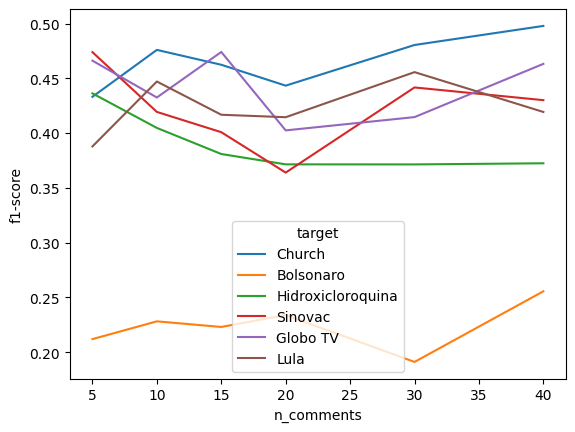

In [11]:
sns.lineplot(data=df_results_macro[df_results_macro['text_col'] == 'Texts'], x="n_comments", y="f1-score", hue="target")

In [20]:
df_results_tbl = pd.DataFrame({
    "number of comments": [],
    "Lula":[], 
    "Bolsonaro":[], 
    "Hydrox." :[], 
    "Sinovac":[], 
    "Globo TV":[], 
    "Church":[]
})

df_results_macro_texts = df_results_macro[df_results_macro['text_col'] == 'Texts']

df_results_macro_texts.target = df_results_macro_texts.target.replace({"Hidroxicloroquina": "Hydrox."})

for n_comments in df_results_macro_texts.n_comments.unique():
    
    dict_results = {"number of comments": n_comments}
    for target in df_results_macro_texts.target.unique():
        
        f1 = df_results_macro_texts[(df_results_macro_texts.target == target)&(df_results_macro_texts.n_comments == n_comments)]['f1-score'].values[0]
        
        dict_results.update({target:f1})
        
    df_results_tbl.loc[len(df_results_tbl)] = dict_results
    
df_results_tbl.Overall = df_results_tbl[list(dict_cp.values())].mean() 
df_results_tbl.sort_values('number of comments', inplace=True)
df_results_tbl

,number of comments,Lula,Bolsonaro,Hydrox.,Sinovac,Globo TV,Church
5,5,0.387847,0.211963,0.436267,0.473904,0.466122,0.433137
0,10,0.447113,0.228177,0.404744,0.419348,0.432521,0.475967
1,15,0.416763,0.223053,0.380923,0.400844,0.474066,0.462389
2,20,0.414510,0.233956,0.371483,0.363973,0.402485,0.443321
3,30,0.455672,0.191139,0.371429,0.441677,0.414612,0.480443
4,40,0.419306,0.255599,0.372455,0.430082,0.463203,0.497846


In [21]:
print(df_results_tbl.to_latex(index = False))

\begin{tabular}{rrrrrrr}
\toprule
number of comments & Lula & Bolsonaro & Hydrox. & Sinovac & Globo TV & Church \\
\midrule
5 & 0.387847 & 0.211963 & 0.436267 & 0.473904 & 0.466122 & 0.433137 \\
10 & 0.447113 & 0.228177 & 0.404744 & 0.419348 & 0.432521 & 0.475967 \\
15 & 0.416763 & 0.223053 & 0.380923 & 0.400844 & 0.474066 & 0.462389 \\
20 & 0.414510 & 0.233956 & 0.371483 & 0.363973 & 0.402485 & 0.443321 \\
30 & 0.455672 & 0.191139 & 0.371429 & 0.441677 & 0.414612 & 0.480443 \\
40 & 0.419306 & 0.255599 & 0.372455 & 0.430082 & 0.463203 & 0.497846 \\
\bottomrule
\end{tabular}



### Timeline

<Axes: xlabel='n_comments', ylabel='f1-score'>

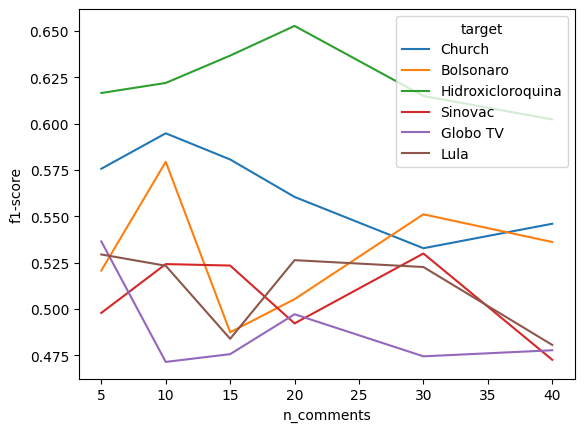

In [22]:
sns.lineplot(data=df_results_macro[df_results_macro['text_col'] == 'Timeline'], x="n_comments", y="f1-score", hue="target")

In [23]:
df_results_tbl = pd.DataFrame({
    "number of comments": [],
    "Lula":[], 
    "Bolsonaro":[], 
    "Hydrox." :[], 
    "Sinovac":[], 
    "Globo TV":[], 
    "Church":[]
})

df_results_macro_timeline = df_results_macro[df_results_macro['text_col'] == 'Timeline']

df_results_macro_timeline.target = df_results_macro_timeline.target.replace({"Hidroxicloroquina": "Hydrox."})

for n_comments in df_results_macro_timeline.n_comments.unique():
    
    dict_results = {"number of comments": n_comments}
    for target in df_results_macro_timeline.target.unique():
        
        f1 = df_results_macro_timeline[(df_results_macro_timeline.target == target)&(df_results_macro_timeline.n_comments == n_comments)]['f1-score'].values[0]
        
        dict_results.update({target:f1})
        
    df_results_tbl.loc[len(df_results_tbl)] = dict_results
    
df_results_tbl.Overall = df_results_tbl[list(dict_cp.values())].mean() 
df_results_tbl.sort_values('number of comments', inplace=True)
df_results_tbl

,number of comments,Lula,Bolsonaro,Hydrox.,Sinovac,Globo TV,Church
5,5,0.529386,0.520674,0.616497,0.497859,0.536406,0.575631
0,10,0.523288,0.579381,0.621923,0.524191,0.471406,0.594754
1,15,0.483885,0.487410,0.636678,0.523399,0.475607,0.580637
2,20,0.526313,0.505263,0.652688,0.492179,0.497130,0.560420
3,30,0.522606,0.551051,0.614887,0.529905,0.474423,0.532749
4,40,0.480578,0.536111,0.602224,0.472567,0.477697,0.545951


In [24]:
print(df_results_tbl.to_latex(index = False))

\begin{tabular}{rrrrrrr}
\toprule
number of comments & Lula & Bolsonaro & Hydrox. & Sinovac & Globo TV & Church \\
\midrule
5 & 0.529386 & 0.520674 & 0.616497 & 0.497859 & 0.536406 & 0.575631 \\
10 & 0.523288 & 0.579381 & 0.621923 & 0.524191 & 0.471406 & 0.594754 \\
15 & 0.483885 & 0.487410 & 0.636678 & 0.523399 & 0.475607 & 0.580637 \\
20 & 0.526313 & 0.505263 & 0.652688 & 0.492179 & 0.497130 & 0.560420 \\
30 & 0.522606 & 0.551051 & 0.614887 & 0.529905 & 0.474423 & 0.532749 \\
40 & 0.480578 & 0.536111 & 0.602224 & 0.472567 & 0.477697 & 0.545951 \\
\bottomrule
\end{tabular}



## BELT 

In [ ]:
belt_list_df_t = [filename for filename in list_df_t if ('belt' in filename) and ('part' not in filename)]
belt_list_df_t

In [ ]:
list_df = []

for filename in belt_list_df_t:
    
    full_file_name = test_results_path + filename
    
    df_aux = pd.read_csv(full_file_name, index_col=0)
    
    df_aux.dropna(subset=['y_pred'], inplace=True)
    
    n_comments = df_aux.n_comments.unique()[0]
    exp_name = df_aux.exp_name.unique()[0]  
    text_col = 'Texts' if 'Texts' in exp_name else 'Timeline' if 'Timeline' in exp_name else None
    
    for target in df_aux.target.unique():
        
        df_aux_t = df_aux[df_aux.target == target]

        df_cr = get_classification_report(df_aux_t.y_test, df_aux_t.y_pred)
        
        df_cr['text_col'] = text_col
        df_cr['n_comments'] = n_comments
        df_cr['target'] = target
        
        list_df.append(df_cr)
    
df_results = pd.concat(list_df)

df_results_macro = df_results.loc['macro avg',:].reset_index(drop=True)
display(df_results_macro.head())

### Texts

In [ ]:
sns.lineplot(data=df_results_macro[df_results_macro['text_col'] == 'Texts'], x="n_comments", y="f1-score", hue="target")

In [ ]:
df_results_tbl = pd.DataFrame({
    "number of comments": [],
    "Lula":[], 
    "Bolsonaro":[], 
    "Hydrox." :[], 
    "Sinovac":[], 
    "Globo TV":[], 
    "Church":[]
})

df_results_macro_texts = df_results_macro[df_results_macro['text_col'] == 'Texts']

df_results_macro_texts.target = df_results_macro_texts.target.map(dict_cp)

for n_comments in df_results_macro_texts.n_comments.unique():
    
    dict_results = {"number of comments": n_comments}
    for target in df_results_macro_texts.target.unique():
        
        f1 = df_results_macro_texts[(df_results_macro_texts.target == target)&(df_results_macro_texts.n_comments == n_comments)]['f1-score'].values[0]
        
        dict_results.update({target:f1})
        
    df_results_tbl.loc[len(df_results_tbl)] = dict_results
    
df_results_tbl.Overall = df_results_tbl[list(dict_cp.values())].mean() 
df_results_tbl.sort_values('number of comments', inplace=True)
df_results_tbl

In [ ]:
print(df_results_tbl.to_latex(index = False))

### Timeline

In [ ]:
df_results_tbl = pd.DataFrame({
    "number of comments": [],
    "Lula":[], 
    "Bolsonaro":[], 
    "Hydrox." :[], 
    "Sinovac":[], 
    "Globo TV":[], 
    "Church":[]
})

df_results_macro_timeline = df_results_macro[df_results_macro['text_col'] == 'Timeline']

df_results_macro_timeline.target = df_results_macro_timeline.target.map(dict_cp)

for n_comments in df_results_macro_timeline.n_comments.unique():
    
    dict_results = {"number of comments": n_comments}
    for target in df_results_macro_timeline.target.unique():
        
        f1 = df_results_macro_timeline[(df_results_macro_timeline.target == target)&(df_results_macro_timeline.n_comments == n_comments)]['f1-score'].values[0]
        
        dict_results.update({target:f1})
        
    df_results_tbl.loc[len(df_results_tbl)] = dict_results
    
df_results_tbl['Overall'] = df_results_tbl[list(dict_cp.values())].mean() 
df_results_tbl.sort_values('number of comments', inplace=True)
df_results_tbl

In [ ]:
print(df_results_tbl.to_latex(index = False))